In [1]:
import itertools
import os
import sys
import uproot
import awkward as ak
import numpy as np
import pandas as pd
from coffea import nanoevents
import vector
import fastjet
from rich import print
from rich.progress import track
import math
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
import hist
from hist import Hist

In [2]:
sys.path.insert(0, '../workflows/')

In [3]:
import SUEP_utils

In [4]:
matplotlib.rcParams.update({'figure.max_open_warning': 0})
hep.style.use(hep.style.CMS)

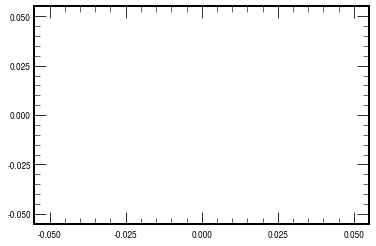

In [5]:
plt.plot();
hep.style.use(hep.style.CMS)

In [6]:
vector.register_awkward()

In [7]:
def get_dr_ring(dr, phi_c=0, eta_c=0, n_points=600):
    deta = np.linspace(-dr, +dr, n_points)
    dphi = np.sqrt(dr**2 - np.square(deta))
    deta = eta_c+np.concatenate((deta, deta[::-1]))
    dphi = phi_c+np.concatenate((dphi, -dphi[::-1]))
    return dphi, deta

In [8]:
# Create directory
output_path = "kinematics_plots/event_displays/muon_pfRelIso_less_than_15/"
if not os.path.exists(output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    if not os.path.exists(output_path + "signal"):
        os.makedirs(output_path + "signal")
    if not os.path.exists(output_path + "QCD"):
        os.makedirs(output_path + "QCD")

Number of events:

| Bin       | nMuon ≥ 6 | nMuon ≥ 5 |
| :-------: | :-------: | :-------: |
| 15To20    | 0         | 0         |
| 20To30    | 0         | 0         |
| 30To50    | 0         | 6         |
| 50To80    | 1         | 11        |
| 80To120   | 0         | 26        |
| 120To170  | 1         | 44        |
| 170To300  | 5         | 65        |
| 300To470  | 1         | 105       |
| 470To600  | 9         |
| 600To800  | 7         |
| 800To1000 | 11        |
| 1000      | 7         |

Processing QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8

Muons:

phi: [2.1, -2.37, -0.607, -2.38, -0.479, -0.541]

eta: [-0.929, 1.02, -1.31, 1.01, -1.32, -1.31]

pt: [133, 16.2, 13, 8.03, 7.03, 6.42]

miniPFRelIso_all: [1.38, 0.392, 2.75, 0.329, 5.06, 5.51]

pfRelIso03_all: [2.39, 0.552, 3.07, 1.11, 6.01, 6.68]

pfRelIso04_all: [2.47, 0.633, 3.61, 1.43, 6.6, 7.09]

AK8Jets:

phi: [2.11, -2.41, -0.557, -2.74, 2.11, -0.609]

eta: [0.928, 1.09, -1.34, -0.987, -0.906, 0.112]

pt: [44.9, 47.6, 50.6, 102, 402, 476]

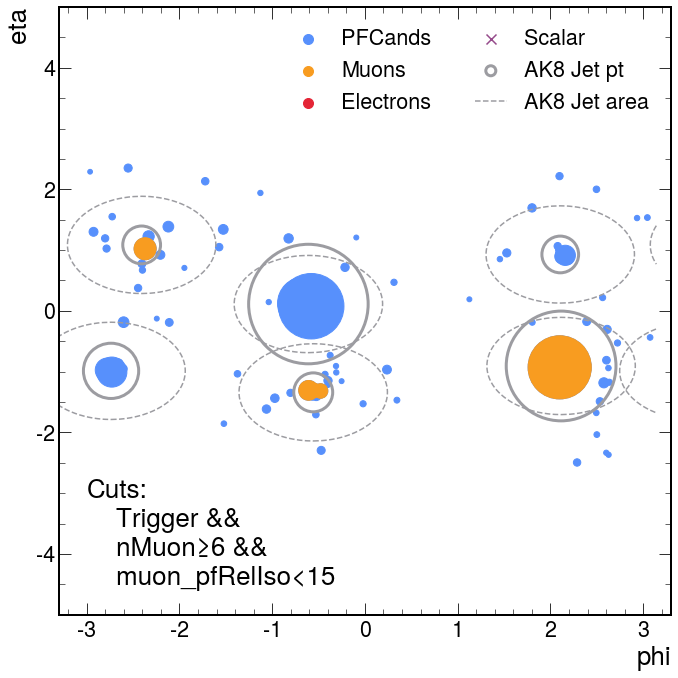

Muons:

phi: [1.07, 1.06, 1.07, 1.46, 1.46, 1.17, 0.901]

eta: [-0.494, -0.492, -0.538, -0.821, -0.758, -0.473, -0.511]

pt: [45.6, 12.9, 7.68, 6.53, 5.5, 5.22, 3.3]

miniPFRelIso_all: [0.992, 3.49, 5.93, 7.91, 11.3, 8.87, 1.51]

pfRelIso03_all: [1.5, 5.27, 19, 10.6, 12.6, 11.5, 31.2]

pfRelIso04_all: [14, 49.2, 84, 12.6, 15.5, 33.5, 192]

AK8Jets:

phi: [-2.05, 1.64, -3.04, -1.88, 1.04]

eta: [-1.43, 1.43, -0.715, -0.0935, -0.792]

pt: [20, 52.8, 77, 531, 705]

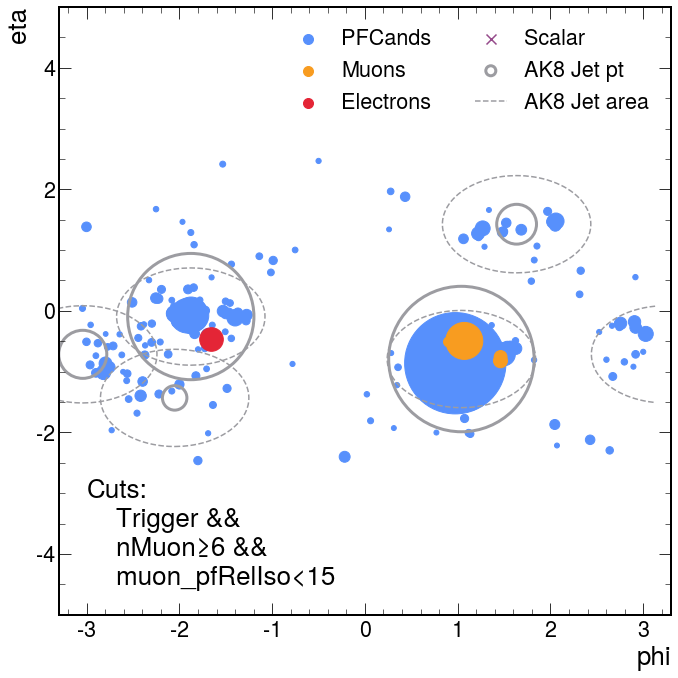

In [14]:
xrd_path = 'root://cmseos.fnal.gov//store/user'

signal = "GluGluToSUEP_T0p35_TuneCP5_13TeV_pythia8"
qcd = "QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8"

signal_datasets = [
    "GluGluToSUEP_T0p35_TuneCP5_13TeV_pythia8",
    "GluGluToSUEP_T2p00_TuneCP5_13TeV_pythia8",
    "GluGluToSUEP_T32p00_TuneCP5_13TeV_pythia8",
]
signal_labels = [
    "SUEP_mS125.000_mPhi1.400_T0.350_modehadronic",
    "SUEP_mS125.000_mPhi2.000_T2.000_modehadronic",
    "SUEP_mS125.000_mPhi8.000_T32.000_modehadronic",
]
qcd_datasets = [
#     "QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
    "QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8",
#     "QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8"
]

iFile = 1

for dataset, label in zip(qcd_datasets, qcd_datasets):
    print(f"Processing {dataset}")
    file = nanoevents.NanoEventsFactory.from_root(
        f"{xrd_path}/chpapage/SUEPNano_Jul2024_merged/{dataset}/skim_{iFile}.root",
        schemaclass=nanoevents.NanoAODSchema,
    )
    events = file.events()

    muons = events.Muon
    events, muons = events[ak.num(muons) > 0], muons[ak.num(muons) > 0]
    clean_muons = (
        (events.Muon.mediumId)
        & (events.Muon.pt > 3)
        & (abs(events.Muon.eta) < 2.4)
        & (abs(events.Muon.dxy) <= 0.02) 
        & (abs(events.Muon.dz) <= 0.1)
        & (events.Muon.miniPFRelIso_all < 15)
    )
    muons = muons[clean_muons]

    select_by_muons_high = ak.num(muons, axis=-1) >= 6
    events = events[select_by_muons_high]
    muons = muons[select_by_muons_high]
    
    if len(events) == 0:
        continue

    Cands = ak.zip(
        {
            "pt": events.PFCands.trkPt,
            "eta": events.PFCands.trkEta,
            "phi": events.PFCands.trkPhi,
            "mass": events.PFCands.mass,
        },
        with_name="Momentum4D",
    )
    cut = (
        (events.PFCands.fromPV > 1)
        & (events.PFCands.trkPt >= 0.75)
        & (abs(events.PFCands.trkEta) <= 2.5)
        & (abs(events.PFCands.dz) < 10)
        & (events.PFCands.dzErr < 0.05)
    )
    Cleaned_cands = Cands[cut]

    scalar = events.GenPart[(events.GenPart.pdgId==25) & (events.GenPart.status==62)]
    scalar_collection = ak.zip(
        {
            "px": scalar.px,
            "py": scalar.py,
            "pz": scalar.pz,
            "mass": scalar.mass,
        },
        with_name="Momentum4D",
    )
    scalar_collection = ak.flatten(scalar_collection)

    ak8jets, ak8jetws_cluster = SUEP_utils.FastJetReclustering(
        ak.packed(Cleaned_cands), r=0.8, min_pt=10
    )

    iEvt = 0
    nPrint = 10
    if len(events) < nPrint:
        nPrint = len(events)
    for iEvt in range(nPrint):
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.scatter(Cleaned_cands[iEvt].phi, Cleaned_cands[iEvt].eta, s=30*Cleaned_cands[iEvt].pt)
        ax.scatter(muons[iEvt].phi, muons[iEvt].eta, s=30*muons[iEvt].pt)
        ax.scatter(events.Electron[iEvt].phi, events.Electron[iEvt].eta, s=30*events.Electron[iEvt].pt)
        ax.scatter(scalar[iEvt].phi, scalar[iEvt].eta, s=30*scalar[iEvt].pt, marker='x')
        ax.scatter(
            ak8jets[iEvt].phi, ak8jets[iEvt].eta, s=30*ak8jets[iEvt].pt,
            facecolors='none', edgecolors='C4', lw=3
        )
        
        print("Muons:")
        print("\tphi:", muons[iEvt].phi)
        print("\teta:", muons[iEvt].eta)
        print("\tpt:", muons[iEvt].pt)
        print("\tminiPFRelIso_all:", muons[iEvt].miniPFRelIso_all)
        print("\tpfRelIso03_all:", muons[iEvt].pfRelIso03_all)
        print("\tpfRelIso04_all:", muons[iEvt].pfRelIso04_all)
        print("AK8Jets:")
        print("\tphi:", ak8jets[iEvt].phi)
        print("\teta:", ak8jets[iEvt].eta)
        print("\tpt:", ak8jets[iEvt].pt)

        for jet in ak8jets[iEvt]:
            phis, etas = get_dr_ring(0.8, jet.phi, jet.eta)
            ax.plot(phis[phis>math.pi]-2*math.pi, etas[phis>math.pi], color='C4', linestyle='--')
            ax.plot(phis[phis<-math.pi]+2*math.pi, etas[phis<-math.pi], color='C4', linestyle='--')
            ax.plot(phis[phis<math.pi], etas[phis<math.pi], color='C4', linestyle='--')

        # ax.text(-3, -4.5, "Cuts:\n    Trigger && \n    nMuon≥6")
        ax.text(-3, -4.5, "Cuts:\n    Trigger && \n    nMuon≥6 && \n    muon_pfRelIso<15")
        if len(scalar_collection) > 0:
            ax.text(1.5, -4.5, r"$\beta_{SUEP} = $" + f"{scalar_collection.beta[iEvt]:.2f}")

        ax.set_xlim(-3.3, 3.3)
        ax.set_ylim(-5, 5)
        ax.set_xlabel('phi')
        ax.set_ylabel('eta')
        ax.scatter([], [], s=100, color='C0', label="PFCands")
        ax.scatter([], [], s=100, color='C1', label="Muons")
        ax.scatter([], [], s=100, color='C2', label="Electrons")
        ax.scatter([], [], s=100, color='C3', marker='x', label="Scalar")
        ax.scatter([], [], s=100, color='C4', facecolors='none', edgecolors='C4', lw=3, label="AK8 Jet pt")
        ax.plot([], [], color='C4', linestyle='--', label="AK8 Jet area")
        ax.legend(ncol=2, loc=1)
        fig.tight_layout()
        fig.savefig(f"{output_path}/signal/{label}_iFile{iFile}_iEvt{iEvt}.pdf")
        plt.show()

In [251]:
iEvt0 = len(events)
print(iEvt0)

12

In [66]:
# Deploy plots
!tar -cf event_displays.tar kinematics_plots/event_displays
!xrdcp -f event_displays.tar root://eosuser.cern.ch//eos/user/c/chpapage/

[4.121MB/4.121MB][100%][==================================================][1.374MB/s]  


In [56]:
gen_parts_final = events.GenPart[events.GenPart.status == 1]
oldest_parents = events.GenPart[gen_parts_final.genPartIdxMother]
while not ak.all((oldest_parents.genPartIdxMother == -1) | (oldest_parents.pdgId == 25)):
    oldest_parents = ak.where(
        (oldest_parents.genPartIdxMother == -1) | (oldest_parents.pdgId == 25),
        oldest_parents,
        events.GenPart[oldest_parents.genPartIdxMother],
    )
gen_parts_final_from_S = gen_parts_final[oldest_parents.pdgId == 25]

In [59]:
gen_parts_final_from_S = gen_parts_final_from_S[select_by_muons_high]

ValueError: in RegularArray attempting to get 31401, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.5/src/cpu-kernels/awkward_RegularArray_getitem_next_array_regularize.cpp#L19)

In [ ]:
gen_parts_collection = ak.zip(
    {
        "px": gen_parts_final_from_S.px,
        "py": gen_parts_final_from_S.py,
        "pz": gen_parts_final_from_S.pz,
        "mass": gen_parts_final_from_S.mass,
    },
    with_name="Momentum4D",
)

nGenParts = 26.000

nGenParts = 26.000

nGenParts = 8.000

nMuon = 6.000

nGenMuon = 6.000

sph = 0.023

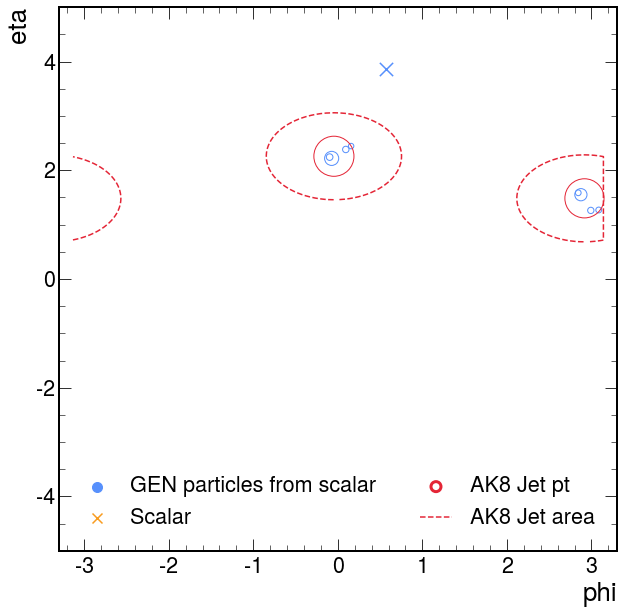

nGenParts = 78.000

nGenParts = 78.000

nGenParts = 10.000

nMuon = 7.000

nGenMuon = 6.000

sph = 0.257

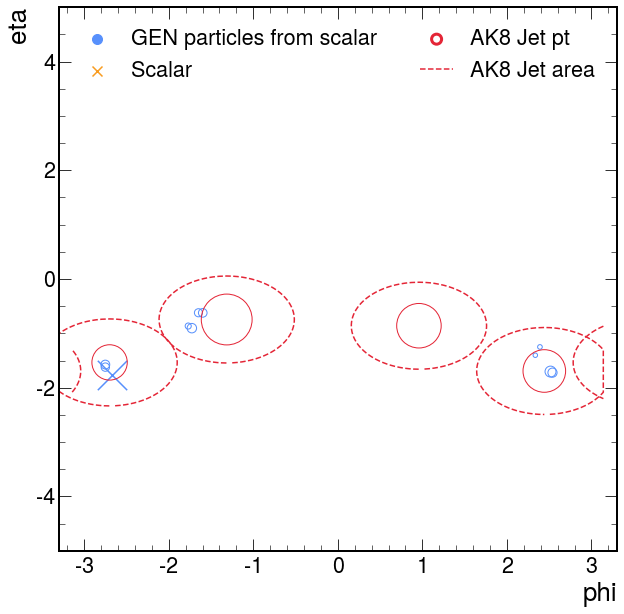

nGenParts = 38.000

nGenParts = 38.000

nGenParts = 8.000

nMuon = 6.000

nGenMuon = 6.000

sph = 0.101

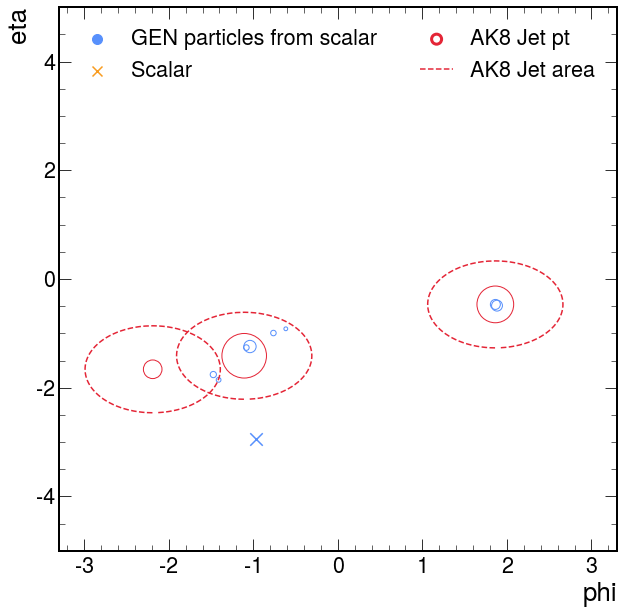

nGenParts = 21.000

nGenParts = 21.000

nGenParts = 8.000

nMuon = 7.000

nGenMuon = 8.000

sph = 0.099

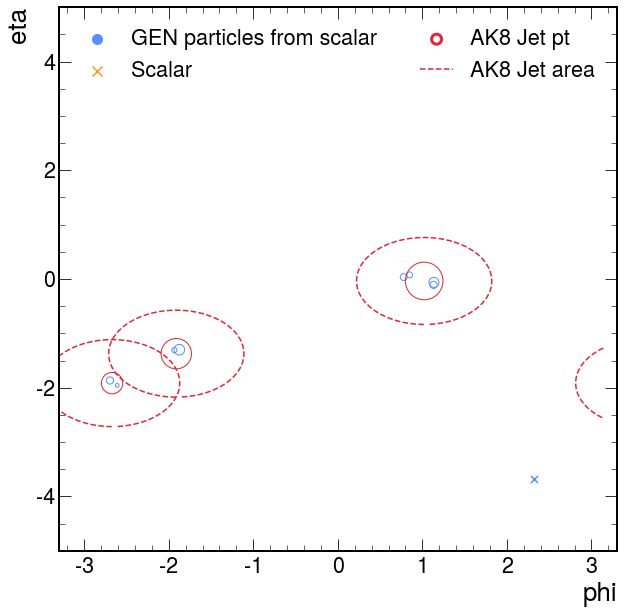

In [94]:
iEvt = 1
for iEvt in range(4):
    plt.scatter(
        gen_parts_collection[iEvt].phi, gen_parts_collection[iEvt].eta, s=5*gen_parts_collection[iEvt].pt, 
        facecolors='none', edgecolors='C0'
    )
    plt.scatter(scalar[iEvt].phi, scalar[iEvt].eta, s=10*scalar[iEvt].pt, marker='x')
    plt.scatter(
        ak8jets[iEvt].phi, ak8jets[iEvt].eta, s=30*ak8jets[iEvt].pt,
        facecolors='none', edgecolors='C2'
    )
    for jet in ak8jets[iEvt]:
        phis, etas = get_dr_ring(0.8, jet.phi, jet.eta)
        phis = phis[1:]
        etas = etas[1:]
        plt.plot(phis[phis>math.pi]-2*math.pi, etas[phis>math.pi], color='C2', linestyle='--')
        plt.plot(phis[phis<-math.pi]+2*math.pi, etas[phis<-math.pi], color='C2', linestyle='--')
        plt.plot(phis[phis<math.pi], etas[phis<math.pi], color='C2', linestyle='--')

    plt.xlim(-3.3, 3.3)
    plt.ylim(-5, 5)
    plt.xlabel('phi')
    plt.ylabel('eta')
    plt.scatter([], [], s=100, color='C0', label="GEN particles from scalar")
    plt.scatter([], [], s=100, color='C1', marker='x', label="Scalar")
    plt.scatter([], [], s=100, color='C2', facecolors='none', edgecolors='C2', lw=3, label="AK8 Jet pt")
    plt.plot([], [], color='C2', linestyle='--', label="AK8 Jet area")
    plt.legend(ncol=2)
    plt.show()

In [1]:
## For Jacob

In [2]:
import uproot
import awkward as ak
from coffea import nanoevents

def get_dr_ring(dr, phi_c=0, eta_c=0, n_points=600):
    """
    Function to get the phi, eta coordinates of the ring 
    around a jet centered at phi_c, eta_c.
    """
    deta = np.linspace(-dr, +dr, n_points)
    dphi = np.sqrt(dr**2 - np.square(deta))
    deta = eta_c+np.concatenate((deta, deta[::-1]))
    dphi = phi_c+np.concatenate((dphi, -dphi[::-1]))
    return dphi, deta

file = nanoevents.NanoEventsFactory.from_root(
    "some_file.root",
    schemaclass=nanoevents.NanoAODSchema,
)
events = file.events()

muons = events.Muon
events, muons = events[ak.num(muons) > 0], muons[ak.num(muons) > 0]
clean_muons = (
    (events.Muon.mediumId)
    & (events.Muon.pt > 3)
    & (abs(events.Muon.eta) < 2.4)
    & (abs(events.Muon.dxy) <= 0.02) 
    & (abs(events.Muon.dz) <= 0.1)
)
muons = muons[clean_muons]

# Get last Scalar (Higgs) particle in the decay chain
scalar = events.GenPart[(events.GenPart.pdgId==25) & (events.GenPart.status==62)]
scalar_collection = ak.zip(
    {
        "px": scalar.px,
        "py": scalar.py,
        "pz": scalar.pz,
        "mass": scalar.mass,
    },
    with_name="Momentum4D",
)
scalar_collection = ak.flatten(scalar_collection)

jets = events.Jet[events.Jet.pt > 20 & abs(events.Jet.eta) < 2.5]

# Number of event in the file to plot
iEvt = 0

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(muons[iEvt].phi, muons[iEvt].eta, s=30*muons[iEvt].pt)
ax.scatter(events.Electron[iEvt].phi, events.Electron[iEvt].eta, s=30*events.Electron[iEvt].pt)
ax.scatter(scalar[iEvt].phi, scalar[iEvt].eta, s=30*scalar[iEvt].pt, marker='x')
ax.scatter(
    jets[iEvt].phi, jets[iEvt].eta, s=30*jets[iEvt].pt,
    facecolors='none', edgecolors='C4', lw=3
)

for jet in jets[iEvt]:
    phis, etas = get_dr_ring(0.4, jet.phi, jet.eta)
    ax.plot(phis[phis>math.pi]-2*math.pi, etas[phis>math.pi], color='C4', linestyle='--')
    ax.plot(phis[phis<-math.pi]+2*math.pi, etas[phis<-math.pi], color='C4', linestyle='--')
    ax.plot(phis[phis<math.pi], etas[phis<math.pi], color='C4', linestyle='--')

ax.text(-3, -4.5, "Cuts:\n    Trigger && \n    some other cut")

ax.set_xlim(-3.3, 3.3)
ax.set_ylim(-5, 5)
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.scatter([], [], s=100, color='C0', label="PFCands")
ax.scatter([], [], s=100, color='C1', label="Muons")
ax.scatter([], [], s=100, color='C2', label="Electrons")
ax.scatter([], [], s=100, color='C3', marker='x', label="Scalar")
ax.scatter([], [], s=100, color='C4', facecolors='none', edgecolors='C4', lw=3, label="AK8 Jet pt")
ax.plot([], [], color='C4', linestyle='--', label="AK8 Jet area")
ax.legend(ncol=2, loc=1)
fig.tight_layout()
# Uncomment below to save the file
# fig.savefig(f"output_path/evt_{iEvt}_display.pdf")
plt.show()

FileNotFoundError: file not found

    'some_file.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.
